## Statistical analysies for Wessel replication 1


In [1]:
import pandas as pd
import statsmodels.formula.api as smf
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt 

datadir = Path('../processed_data')


### Auction data analyses

In [2]:
### load data

auction_datafile = datadir / 'study-1_task-auction_data.tsv'
auction_data = pd.read_csv(auction_datafile, sep='\t', index_col=0)

print(auction_data.columns)

Index(['auctionStimValue', 'auctionCondition', 'chosenAuctionAmount',
       'subcode'],
      dtype='object')


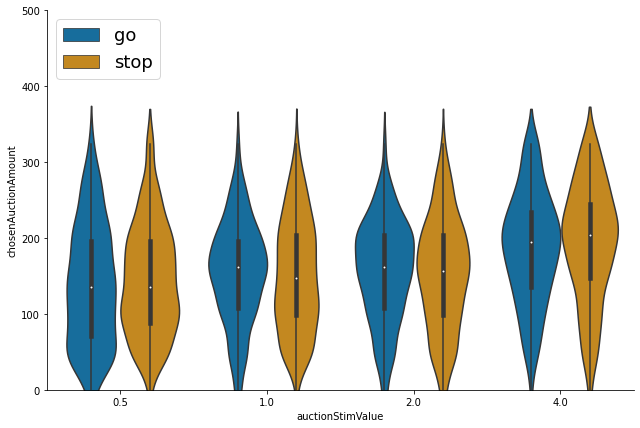

In [6]:
viol_plot = sns.catplot(x='auctionStimValue', 
                           y='chosenAuctionAmount', 
                           hue='auctionCondition', 
                           data=auction_data, 
                           palette="colorblind",
                           kind='violin',
                           height = 6,
                           aspect = 1.5,
                           legend=False)
#viol_plot = sns.violinplot(x='auctionStimValue', y='chosenAuctionAmount', hue='auctionCondition', data=auction_data, legend=False)
plt.ylim([0, 500])
viol_plot.ax.legend(loc=2, fontsize=18)

In [4]:
### Fit model to data

md = smf.mixedlm("chosenAuctionAmount ~ auctionStimValue*auctionCondition", auction_data, groups=auction_data["subcode"])
mdf = md.fit()
print(mdf.summary())

                         Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        chosenAuctionAmount
No. Observations:         2480           Method:                    REML               
No. Groups:               31             Scale:                     5037.6294          
Min. group size:          80             Log-Likelihood:            -14107.4386        
Max. group size:          80             Converged:                 Yes                
Mean group size:          80.0                                                         
---------------------------------------------------------------------------------------
                                           Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------------------------
Intercept                                 135.427    4.613 29.355 0.000 126.385 144.469
auctionCondition[T.stop]                    0.065    4.90

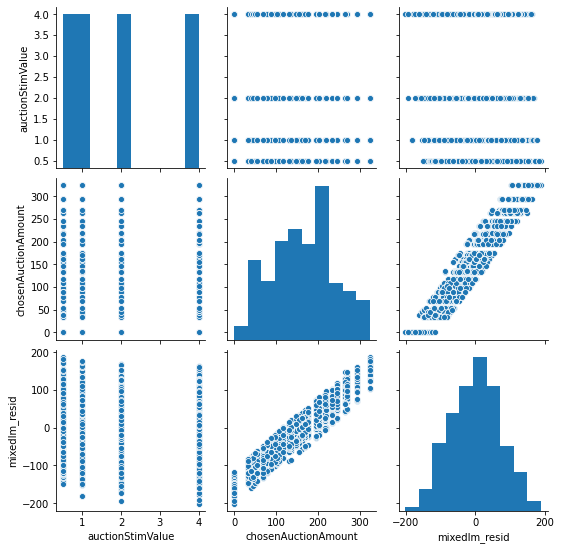

In [5]:
## Diagnostic plots

auction_data['mixedlm_resid'] = mdf.resid
sns.pairplot(auction_data)